# Статус, отмена и перезапуск расчетов
В данном ноутбуке демонстрируется работа методов, позволяющих:

* [получить статус задачи](#Статус-задачи)
* [отменить расчет](#Отмена-расчета)
* [перезапустить расчет](#Перезапуск-расчета)

## Инициализация

При построении отчета первый шаг в любом ноутбуке - загрузка библиотек, которые помогут обращаться к TVI API и работать с данными.

Выполните следующую ячейку, для этого перейдите в нее и нажмите Ctrl+Enter

In [ ]:
%reload_ext autoreload
%autoreload 2

import pandas as pd

from mediascope_api.core import net as mscore
from mediascope_api.mediavortex import tasks as cwt
from mediascope_api.mediavortex import catalogs as cwc

# Cоздаем объекты для работы с TVI API
mnet = mscore.MediascopeApiNetwork()
mtask = cwt.MediaVortexTask()
cats = cwc.MediaVortexCats()

После отправки задачи на расчет выводится ее идентификатор (или список идентификаторов, если расчет происходит по группе задач). Например, запустим ноутбук **timeband_overall_figures_01_basic_channels_figures**:

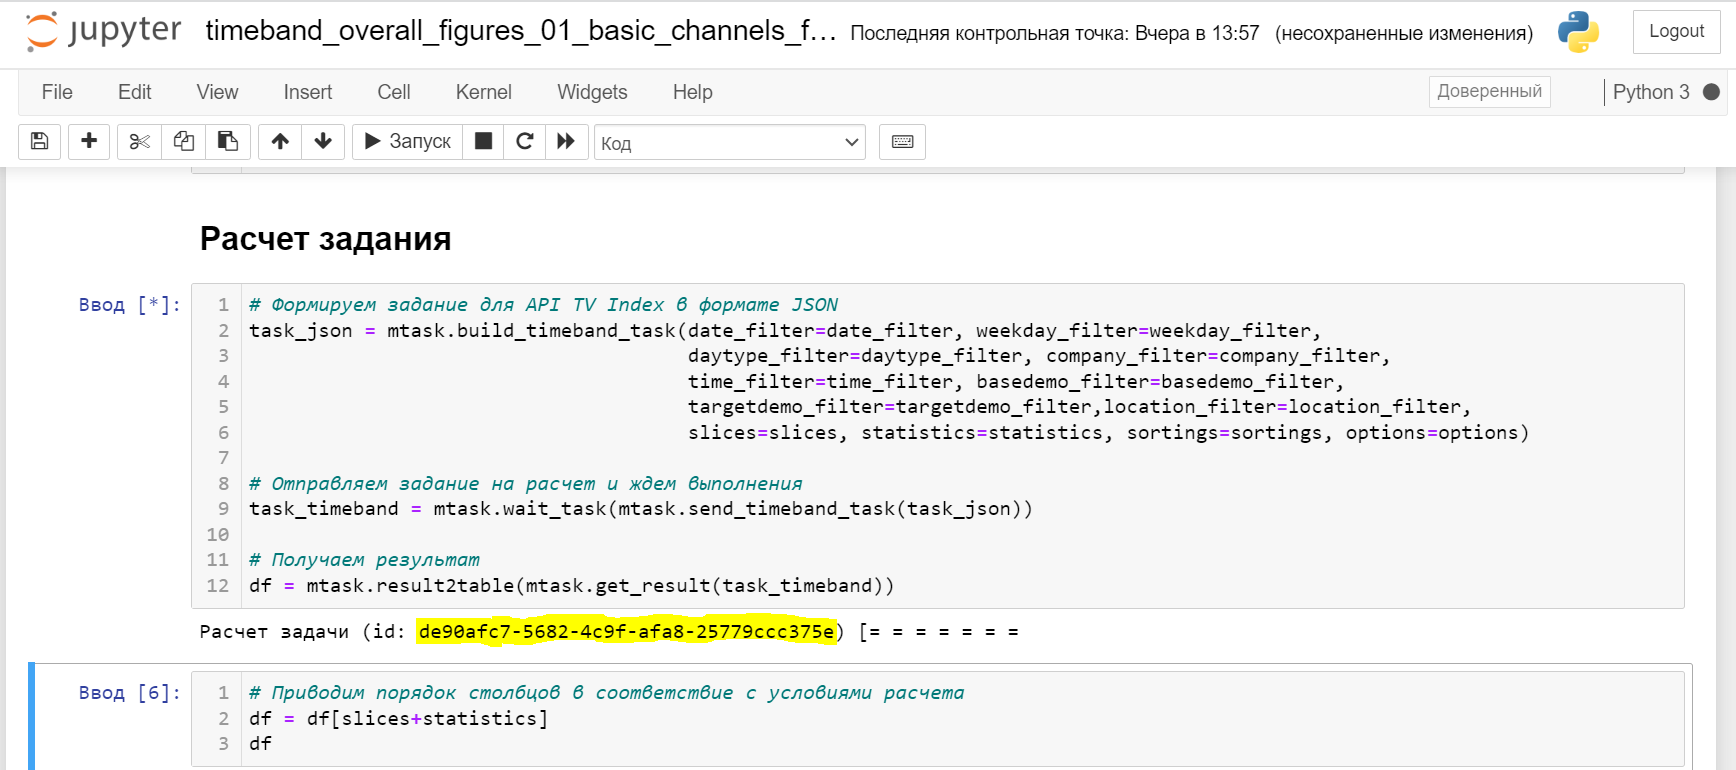

Зная id задачи, мы можем получить ее статус, отменить расчет и запустить его заново. 

## Статус задачи

In [ ]:
# Скопируйте id задачи, запущенной в другом ноутбуке, и вставьте ниже:
t = {
    "taskId": '84c07065-52f9-4a83-88f2-f7c1050da475',
}

mtask.get_status(t)

Возможные значения:
- DONE
- FAILED
- IN_PROGRESS
- CANCELLED
- IN_QUEUE

## Отмена расчета
Задачи в статусе IN_PROGRESS или IN_QUEUE можно отменить:

In [ ]:
# функция отмены, которая принимает список id заданий
# cписок может состоять и из одного значения
mtask.cancel_tasks(['84c07065-52f9-4a83-88f2-f7c1050da475'])

## Перезапуск расчета

In [ ]:
# функция перезапуска, которая принимает список id заданий. 
# cписок может состоять и из одного значения
mtask.restart_tasks(['84c07065-52f9-4a83-88f2-f7c1050da475'])

Ожидаем окончание расчета задания

In [ ]:
t = {
    "taskId": '84c07065-52f9-4a83-88f2-f7c1050da475'
}

mtask.wait_task(t)

Выводим результат расчета задания в виде датафрейма pandas

In [ ]:
mtask.result2table(mtask.get_result(t))